In [2]:
!pip install tensorflow-gpu

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [10]:
import tensorflow as tf

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Dropout, MaxPooling2D, AveragePooling2D, Dense, Flatten, Input, Conv2D, add, Activation
from tensorflow.keras.layers import (Dense, Dropout, Activation, Flatten, Reshape, Layer,
                          BatchNormalization, LocallyConnected2D,
                          ZeroPadding2D, Conv2D, MaxPooling2D, Conv2DTranspose,
                          GaussianNoise, UpSampling2D, Input)

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential , Model , load_model
from tensorflow.keras.preprocessing.image import load_img ,img_to_array , ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD


from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer


import matplotlib.pyplot as plt

import cv2
from imutils import paths
import numpy as np
import os
import time
import warnings
warnings.filterwarnings("ignore")

In [5]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Datasets/Train'
valid_path = '/content/drive/My Drive/Datasets/Test'

In [7]:
batch_size = 32


train_datagen = ImageDataGenerator(rescale = 1./255,
                            rotation_range=45,
                            zoom_range=0.40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.15,
                            horizontal_flip=True,
                            vertical_flip= True,
                            fill_mode="nearest")

train_data = train_datagen.flow_from_directory('/content/drive/My Drive/Datasets/Train',
                                              target_size=(150,150),
                                              batch_size=32,
                                              class_mode="categorical")


Found 715 images belonging to 4 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_data = test_datagen.flow_from_directory('/content/drive/My Drive/Datasets/Test',
                                            target_size=(150,150),
                                            batch_size=32,
                                            class_mode="categorical")

Found 188 images belonging to 4 classes.


Model: "SoilNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        32832     
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        6560

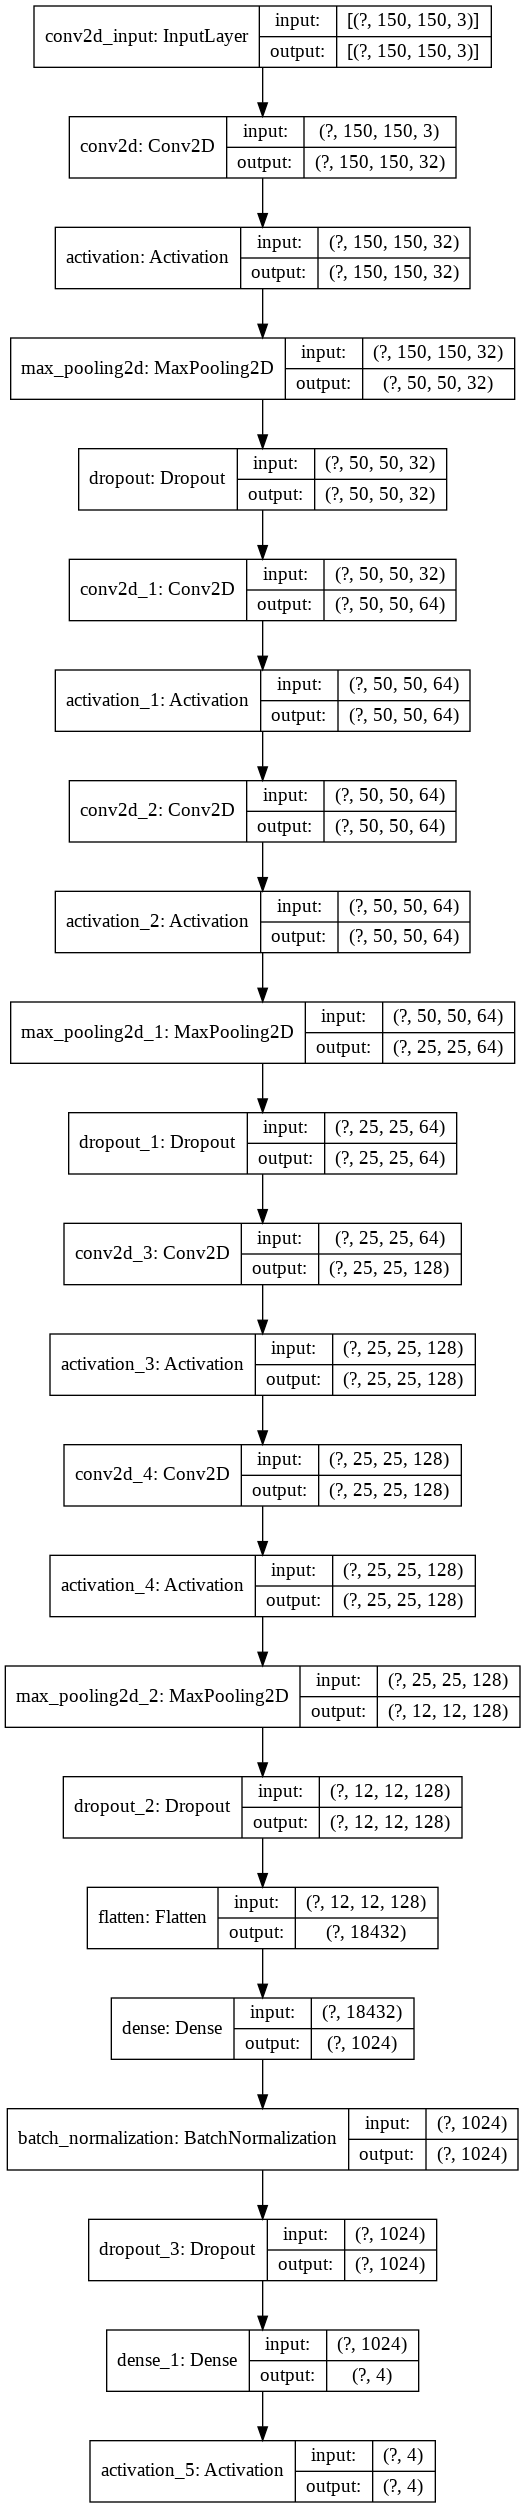

In [11]:
model = Sequential(name="SoilNet")
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(150,150,3)))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (4, 4), padding="same"))
model.add(Activation("relu"))

model.add(Conv2D(64, (4, 4), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (4, 4), padding="same"))
model.add(Activation("relu"))

model.add(Conv2D(128, (4, 4), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation("softmax"))


model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

model.summary()
plot_model(model,show_shapes=True)

In [16]:
start = time.time()

r = model.fit(
  train_data,
  validation_data=test_data,
  epochs=20,
  steps_per_epoch=len(train_data),
  validation_steps=len(test_data)
)
                    
end = time.time()
print("Total train time: ",(end-start)/60," mins")

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
23/23 [==============================] - 8s 331ms/step - loss: 0.7537 - accuracy: 0.7860 - val_loss: 1.8193 - val_accuracy: 0.7766
Epoch 2/20
23/23 [==============================] - 8s 327ms/step - loss: 0.6418 - accuracy: 0.8056 - val_loss: 6.5032 - val_accuracy: 0.3883
Epoch 3/20
23/23 [==============================] - 7s 323ms/step - loss: 0.6068 - accuracy: 0.8014 - val_loss: 3.3532 - val_accuracy: 0.5532
Epoch 4/20
23/23 [==============================] - 8s 333ms/step - loss: 0.5795 - accuracy: 0.8182 - val_loss: 0.6311 - val_accuracy: 0.8723
Epoch 5/20
23/23 [==============================] - 8s 331ms/step - loss: 0.5049 - accuracy: 0.8308 - val_loss: 3.7022 - val_accuracy: 0.4894
Epoch 6/20
23/23 [==============================] - 7s 321ms/step - loss: 0.5177 - accuracy: 0.8490 - val_loss: 2.2595 - val_accuracy: 0.6170
Epoch 7/20
23/23 [==============================] - 7s 317ms/step - loss

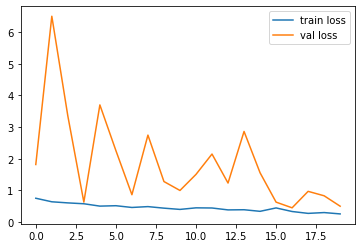

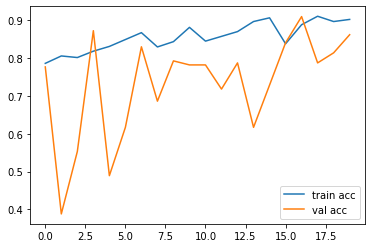

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
model.save("SoilNet.h5")